#  Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:#ff0000">RED</span>, <span style="color:#0000ff">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:#6AA84F">PURPLE</span>, <span style="color:#674ea7">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In this project, we will investigate the Stroop Effect. We will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task. We will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, we will interpret our results in terms of our hypotheses.

#### 1. What is our independent variable? What is our dependent variable?
- Independent variable: Word Condition(Congruent or Incongruent)<br/>
- Dependent variable: The time taken to name the ink color of the words.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
- Null Hypothesis($H_0$):The population averge time taken to name the ink color of incongruent  words is same or less than the population average time taken to name the ink color of congruent words.<br/>
- Alternative Hypothesis($H_a$):The population averge time taken to name the ink color of the incongruent  words is more than the population average time taken to name the ink color of congruent words.<br/>
$H_0:\mu_i\leq\mu_c$<br/>
$H_a:\mu_i>\mu_c$

I will be performing a Depenedent samples t-Test because of following reasons:<br/>
   1)the participants in both the conditions were same,<br/>
   2)the sample size is 25 which is less than 30,<br/>
   3)the population mean and standard deviation is unknown.<br/>
The test will be a one tailed t-Test because my directional alternative hypothesis is that population average time taken to read incongruent words is more than population average time taken to read incongruent words. 

**Assumption**: We will assume a confidence level of 95%.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
- **Sample size** = 24


- **Minimum value:**

    Congruent: 8.63 , Incogruent: 15.687
    

- **Maximum value**

    Congruent: 22.328 , Incogruent: 35.255


- **Mean:**

    Congruent: 14.05 , Incogruent: 22.02
    

- **Median:**

    Congruent: 14.3565 , Incongruent: 21.0175
    

- **Variance:**

    Congruent: 12.67 , Incongruent: 23.012
    

- **Sample standard deviation:**

    Congruent: 3.56 , Incongruent: 4.80
    

In [1]:
import pandas as pd

#read csv in df
df = pd.read_csv("stroopdata.csv")

#produce some very useful statistics about the data using describe method
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [2]:
#we will use median method of pandas to find the median of both columns
print("median of congruent condition samples is {}".format(df['Congruent'].median()))
print("median of incongruent condition samples is {}".format(df['Incongruent'].median()))

#we will use var method of pandas to find the variance of both columns
print("variance of congruent condition samples is {}".format(df['Congruent'].var()))
print("variance of incongruent condition samples is {}".format(df['Incongruent'].var()))

median of congruent condition samples is 14.3565
median of incongruent condition samples is 21.0175
variance of congruent condition samples is 12.669029070652174
variance of incongruent condition samples is 23.011757036231884


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Below are the histograms which show the distribution of congruent and incongruent conditions.

From the histograms below, we can observe that the time taken to complete the test in incongruent condition is very often more while compared to time taken to complete test in congruent condition.

Also we can see that the time required to complete the task in congruent condition ranges from about 9 seconds to about 22 seconds and for incongruent it ranges from about 16 seconds to about 35 seconds.

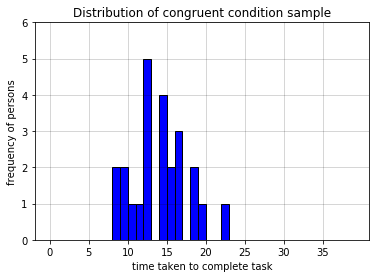

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

#we will set the range of x axis from 0 to maximum of maximum of congruent and incongruent columns
maxrange = int(max(max(df['Congruent']),max(df['Incongruent'])))+5
bins = [x for x in range(0,maxrange,1)]

#histogram of distribution of congruent condition sample
plt.hist(df['Congruent'], bins = bins, ec='black', range =(0,maxrange), color = 'b')
plt.xlabel("time taken to complete task")
plt.ylabel("frequency of persons")
plt.xticks([x for x in range(0,maxrange,5)])
plt.yticks([x for x in range(0,7,1)])
plt.title("Distribution of congruent condition sample")
plt.grid(color='black',alpha=0.2)
plt.show()

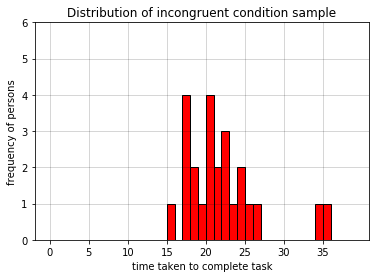

In [13]:
#histogram of distribution of incongruent condition sample

plt.hist(df['Incongruent'], bins, ec='black', range =(0,maxrange), color = 'r')
plt.xlabel("time taken to complete task")
plt.ylabel("frequency of persons")
plt.xticks([x for x in range(0,maxrange,5)])
plt.yticks([x for x in range(0,7,1)])
plt.title("Distribution of incongruent condition sample")
plt.grid(color='black',alpha=0.2)
plt.show()

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Level of significance**, $\alpha$ = 1 - 0.95 = 0.05

where 0.95 is the level of confidence

**sample size**, n = 24

**degrees of freedom**, n = 23

**Decision Rule**:  We have a level of significance of 0.05 which means we are looking for the 5% values that are rare.
So we need to find what t-score is associated with $\alpha$ = 0.05 and then we will calculate t-statistic and if our t-statistic is greater than t-critical , we can conclude that our t-statistic is a rare score and is unlikely and we will reject the null hypothesis.

**Calculate critical values**

$    t_{0.05 @ 23df}$ = 1.714
    

**Calculate t-statistic**

**mean difference**, $\bar{d} = \Sigma (y_i − x_c)/n$ = 7.964

where $y_i$ is incongruent, $x_c$ is the congruent values, n is the sample set

**standard deviation of difference**, sd = 4.86

**standard error of the difference**, SE($\bar{d}$) = sd/$\sqrt{n}$ = 4.86/$\sqrt{24}$ = 0.99

**t-statistic**, T = $\bar{d}$/SE($\bar{d}$) = 7.964/0.99 = 8.04

**Results** 

Since the t-value falls within the critical region and is far above the positive t-critical , we reject the null hypothesis at this level of significance.

**Conclusion**

The time to complete the task of reading incongruent words is significantly greater than the time required to complete the task of reading congruent words.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe that the brain can’t help but read. As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer.<br/>

Another similar task to the original Stroop test is Reverse Stroop test but in this test the participant is presented with a black square with the name of a colour printed in the middle but it is printed with a colour inconsistent with the printed word, for example the word blue will be printed in red. The black square will have four smaller squares in each corner and each of the smaller squares would be a different colour. The researcher would ask the participants to point to one of the smaller squares that is the same colour as the printed word in the middle, for example they would point at the red box because the word printed is in red but unsurprisingly enough participant do actually get this wrong. The effects of this test is very similar if not the same as the original Stroop test causing slower reaction and processing time.<img src='PBRStroop1.png'/>

#### References

https://en.wikipedia.org/wiki/Stroop_effect

https://www.youtube.com/watch?v=EGpzftQf8oI

https://faculty.washington.edu/chudler/words.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

http://brainstormpsychology.blogspot.in/2013/08/the-stroop-effect.html
